In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_days = 252

In [4]:
wanted_stocks = ['GOOG', 'SPG', 'GOOGL', 'MSFT', 'GD', 'ACN', 'COP', 'F', 'BAC', 'GS',
       'NVDA', 'AIG', 'MS', 'WFC', 'ORCL', 'XOM', 'TGT', 'LOW', 'EXC', 'COST',
       'AXP', 'BK', 'JPM', 'COF', 'CSCO', 'DHR', 'UNH', 'CVS', 'LLY', 'CVX',
       'MET', 'AMT', 'CRM', 'BLK', 'RTX', 'MCD', 'TMO', 'LIN', 'ADBE', 'EMR',
       'USB', 'UPS', 'TSLA', 'PFE', 'PM']

In [5]:
sap100 = (pd.read_csv('data/benchmark-sap100.csv',index_col=0,parse_dates=True)
.rename(columns={'Adj Close':'SAP100'})['SAP100'])
sap500 = (pd.read_csv('data/benchmark-sap500.csv',index_col=0,parse_dates=True)
.rename(columns={'Close':'SAP500'})['SAP500']).str.replace(',','').astype('float')
nasdaq = (pd.read_csv('data/benchmark-nasdaq100.csv',index_col=0,parse_dates=True)
.rename(columns={'Adj Close':'NASDAQ100'})['NASDAQ100'])


benchmarks = pd.concat([sap100,sap500,nasdaq],axis=1)
benchmarks.head()

,SAP100,SAP500,NASDAQ100
Date,,,
2021-01-04,1696.859985,3700.65,12694.660156
2021-01-05,1708.219971,3726.86,12802.379883
2021-01-06,1706.750000,3748.14,12623.349609
2021-01-07,1734.790039,3803.79,12939.570313
2021-01-08,1747.329956,3824.68,13105.200195


In [6]:
returns = benchmarks/benchmarks.shift(1) - 1
returns.head()

,SAP100,SAP500,NASDAQ100
Date,,,
2021-01-04,NaN,NaN,NaN
2021-01-05,0.006695,0.007083,0.008485
2021-01-06,-0.000861,0.005710,-0.013984
2021-01-07,0.016429,0.014847,0.025050
2021-01-08,0.007228,0.005492,0.012800


In [7]:
rates = returns.mean() * num_days
rates

SAP100       0.279310
SAP500       0.273886
NASDAQ100    0.285517
dtype: float64

In [8]:
volatiliies = returns.std() * np.sqrt(num_days)
volatiliies.head()

SAP100       0.129211
SAP500       0.125617
NASDAQ100    0.181307
dtype: float64

In [9]:
markowitz = np.array([0.06136557, 0.02856094, 0.01      , 0.01      , 0.01      ,
       0.01      , 0.05127578, 0.07028322, 0.01      , 0.01      ,
       0.04008267, 0.01      , 0.01      , 0.01      , 0.10969695,
       0.01      , 0.01      , 0.01604873, 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.0844026 , 0.01      , 0.01      , 0.08856193, 0.01      ,
       0.01      , 0.09972161, 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ])
geneticAlg = np.array([0.01645208, 0.0322002,  0.01365159,0.08322032, 0.03114179, 0.02503631,
 0.02852424, 0.03133215, 0.00896659, 0.02004556, 0.01606103, 0.01750719,
 0.00217907, 0.01416346, 0.12899603, 0.01344529, 0.00154887, 0.02063509,
 0.01917004, 0.0287973,  0.01228395, 0.00902642, 0.01862372, 0.00800605,
 0.01203194, 0.03146646, 0.02361481, 0.00148632, 0.10470478, 0.01947316,
 0.00611707, 0.0183105,  0.02571685, 0.00999524, 0.00030258, 0.00796955,
 0.02272337, 0.00152548, 0.01253436, 0.00851215, 0.00813952, 0.00551268,
 0.02363687, 0.03742157, 0.01779043])

In [10]:
stocks = pd.read_csv('data/sap100_data_08112021.csv',index_col=0,parse_dates=True).loc[:,wanted_stocks]
stocks = stocks/stocks.shift(1)
stocks.head()

,GOOG,SPG,GOOGL,MSFT,GD,ACN,COP,F,BAC,GS,...,MCD,TMO,LIN,ADBE,EMR,USB,UPS,TSLA,PFE,PM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,1.007337,1.004347,1.008064,1.000965,1.000480,1.005693,1.057367,1.015258,1.007659,1.022377,...,1.005994,1.012505,1.015687,1.000721,1.017305,1.003252,0.986081,1.007317,1.010323,1.010920
2021-01-06,0.996766,1.022845,0.990132,0.974071,1.025546,1.010933,1.039914,1.021965,1.062459,1.053962,...,0.997730,1.015679,1.032830,0.960098,1.033644,1.059218,0.997028,1.028390,0.991395,1.001335
2021-01-07,1.029943,1.000705,1.029869,1.028457,1.013223,1.009435,1.027350,1.024887,1.022084,1.021362,...,1.004645,1.031162,0.997127,1.024512,1.000488,1.019996,0.987332,1.079447,1.005153,1.005818
2021-01-08,1.011168,1.015976,1.013239,1.006093,0.993738,1.003648,1.000000,0.993377,0.989957,0.994617,...,1.018351,1.023924,0.998818,1.015406,0.996954,0.986597,0.996164,1.078403,1.001889,1.001325


In [18]:
balance1 = pd.Series(markowitz * 100000,index = stocks.columns)
balance2 = pd.Series(geneticAlg*100000,index=stocks.columns)
portfolio1 = pd.DataFrame(balance1)
portfolio2 = pd.DataFrame(balance2)
for index,row in stocks.iloc[1:,:].iterrows():
    new_balance1 = row * balance1
    new_balance2 = row * balance2
    portfolio1 = pd.concat([portfolio1,new_balance1],axis=1)
    portfolio2 = pd.concat([portfolio2,new_balance2],axis=1)
    balance1 = new_balance1
    balance2 = new_balance2
portfolio1.columns = stocks.index
portfolio2.columns = stocks.index
portfolio1 = portfolio1.T
portfolio2 = portfolio2.T
portfolio1 = pd.DataFrame(portfolio1.sum(axis=1)).rename(columns={0:'markowitz'})
portfolio2 = pd.DataFrame(portfolio2.sum(axis=1)).rename(columns={0:'genAlg'})
portfolios = pd.concat([portfolio1,portfolio2],axis=1)
portfolios.head()

,markowitz,genAlg
Date,,
2021-01-04,100000.000000,100000.003000
2021-01-05,101052.530604,100666.591951
2021-01-06,102088.929537,101635.521781
2021-01-07,103754.881790,103212.261116
2021-01-08,104442.777708,103868.868108


corr(A,B) = cov(A,B) / sqrt(var(A) * var(B))

In [19]:
for index in ['SAP100','SAP500','NASDAQ100']:
    covar = pd.concat([(portfolio1/portfolio1.shift(1)-1),returns[index]],axis=1).cov().iloc[0,1] * num_days
    var1 = ((portfolio1/portfolio1.shift(1)-1).std() * np.sqrt(num_days))**2
    var2 = (returns[index].std() * np.sqrt(num_days)) ** 2
    print('corr(markowitz,',index,')=',float(covar/np.sqrt(var1*var2)))

corr(markowitz, SAP100 )= 0.8429338269601193
corr(markowitz, SAP500 )= 0.8864307993825744
corr(markowitz, NASDAQ100 )= 0.6435241224005731


In [20]:
for index in ['SAP100','SAP500','NASDAQ100']:
    covar = pd.concat([(portfolio2/portfolio2.shift(1)-1),returns[index]],axis=1).cov().iloc[0,1] * num_days
    var1 = ((portfolio2/portfolio2.shift(1)-1).std() * np.sqrt(num_days))**2
    var2 = (returns[index].std() * np.sqrt(num_days)) ** 2
    print('corr(genAlg,',index,')=',float(covar/np.sqrt(var1*var2)))

corr(genAlg, SAP100 )= 0.8465870998424274
corr(genAlg, SAP500 )= 0.8839605442031074
corr(genAlg, NASDAQ100 )= 0.6335915691103964


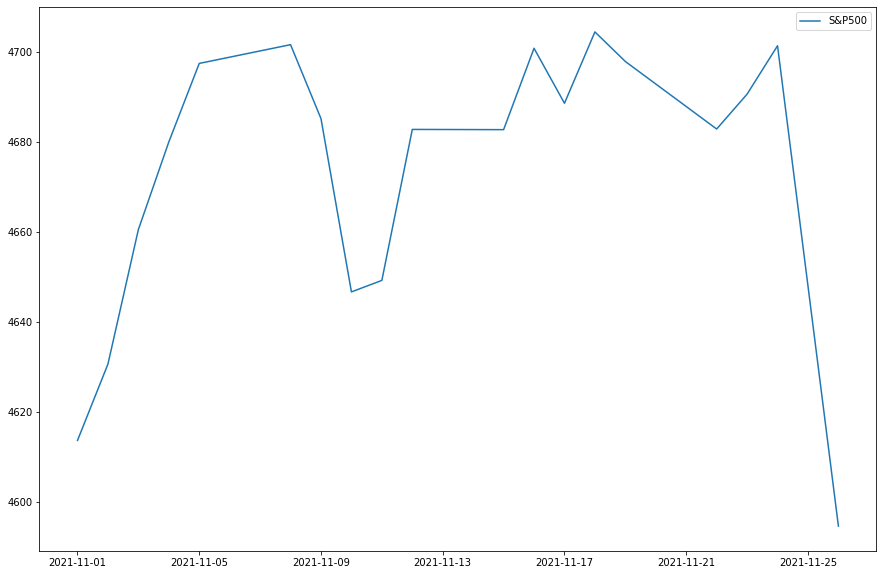

In [92]:
validationSAP500 = (pd.read_csv('data/validation-sap500.csv',index_col=0,parse_dates=True)
.rename(columns={'Close':'SAP500'})['SAP500']).str.replace(',','').astype('float')
plt.figure(figsize=(15,10))
plt.plot(validationSAP500.index,validationSAP500,label='S&P500')
plt.legend()
plt.show()